## Observations and Insights 
1. Based upon mean tumor volumes overall, Capomulin and Ramicane appear to be the most effective by a wide margin. This is evident in the bar graphs as well with mice in those treatment groups having noticably greater survivorship over time.

2. Mouse 'c326' is an extreme outlier and consideration should be given to excluding data from this mouse in the dataset.

3. Weight is significantly highly positively correlated with tumor volume, meaning as weight increases tumor volume tends to also increase. The cause of this correlation is not clear from this analysis however.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata.head())
#print(study_results.head())

# Combine the data into a single dataset

# merges datasets based upon Mouse ID
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
# Displays the first 15 lines of the combined dataset.
combined_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
# Creates a list of Mouse IDs in the the dataset and then counts the number of unique values.
mouseID = combined_df['Mouse ID']
print(f"The number of unique mice is:", mouseID.nunique())

The number of unique mice is: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Creates of list of boolean values based upon whether a row is a duplicate for Mouse ID and Timepoint
DupID = combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])

#Uses the list of booleans to print the Mouse ID of every duplicate row
n = 0
print('The following mouse IDs have duplicate values for Timepoint:')
for x in DupID:
    if x:
        print(combined_df['Mouse ID'].loc[n])
    n = n + 1

The following mouse IDs have duplicate values for Timepoint:
g989
g989
g989
g989
g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Creates and prints a new dataframe that is composed of the rows in the dataset that have duplicate
# values for Mouse ID and Timepoint

dupinfo = combined_df[combined_df['Mouse ID'] == 'g989']
dupinfo


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# creates a list of indexes where the Mouse ID is 'g989'
index = combined_df[combined_df['Mouse ID'] == 'g989'].index

# creates a new df that drops rows with the indexes for Mouse ID 'g989'
cleaned_df = combined_df.drop(index)

In [84]:
# Checking the number of mice in the clean DataFrame.
#prints the number of unique Mouse IDs in the new DataFrame
print(f"The number of unique mice in the cleaned dataset is:", cleaned_df['Mouse ID'].nunique())

The number of unique mice in the cleaned dataset is: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Creates of list of unique drug regimens
regimens = cleaned_df['Drug Regimen'].unique()

#Creates a list of each summary statistic for each drug regimen in the regimens list 
means = [cleaned_df[cleaned_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].mean() for x in regimens]
medians = [cleaned_df[cleaned_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].median() for x in regimens]
variance = [cleaned_df[cleaned_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].var() for x in regimens]
std = [cleaned_df[cleaned_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].std() for x in regimens]
sem = [cleaned_df[cleaned_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].sem() for x in regimens]

#Creates a new df to hold the summary stats calculated above
summary_df = pd.DataFrame({'Drug Regimen': regimens,
                           'Mean Tumor Volume': means,
                           'Median Tumor Volume': medians,
                           'Variance': variance,
                           'Standard Deviation' : std,
                           'Standard Error': sem
                                })
summary_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Extracts only drug regimen and tumor volume from the cleaned dataset
df = cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Groups the new dataset by drug regimen
group_df = df.groupby(['Drug Regimen'])

#Calculates summary statistics off of the grouped object and collects them into a single df for printing
summary_df2 = pd.DataFrame({
                           'Mean Tumor Volume': group_df.mean()['Tumor Volume (mm3)'],
                           'Median Tumor Volume': group_df.median()['Tumor Volume (mm3)'],
                           'Variance': group_df.var()['Tumor Volume (mm3)'],
                           'Standard Deviation' : group_df.std()['Tumor Volume (mm3)'],
                           'Standard Error': group_df.sem()['Tumor Volume (mm3)']
                                 })
summary_df2



,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

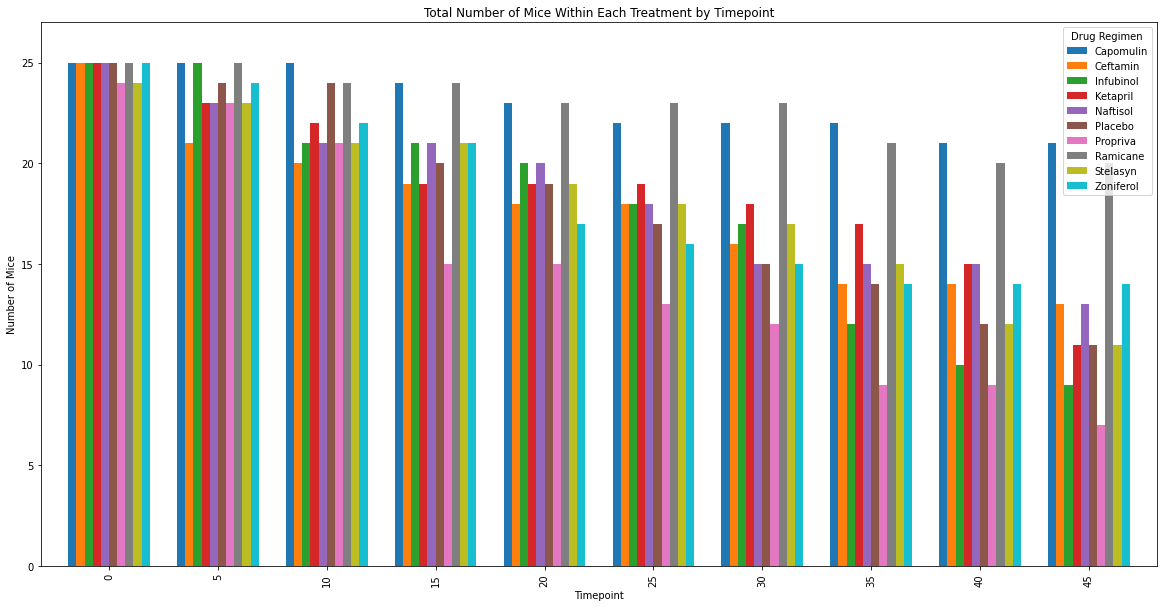

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Creates new df with necessary data
filtered_df = cleaned_df[['Timepoint', 'Drug Regimen']]

# Groups new df by Timepoint
new_df = filtered_df.groupby(['Timepoint'])

#Counts the number of mice in each timepoint
num_mice = new_df['Drug Regimen'].value_counts()

#Creates new columns needed for charting by unstacking grouped object
unstacked_df = num_mice.unstack(level=-1)

#Creates bar plot
unstacked_df.plot(kind='bar', figsize=(20, 10), ylim=(0, 27), ylabel='Number of Mice', width = 0.75,
                  title='Total Number of Mice Within Each Treatment by Timepoint')


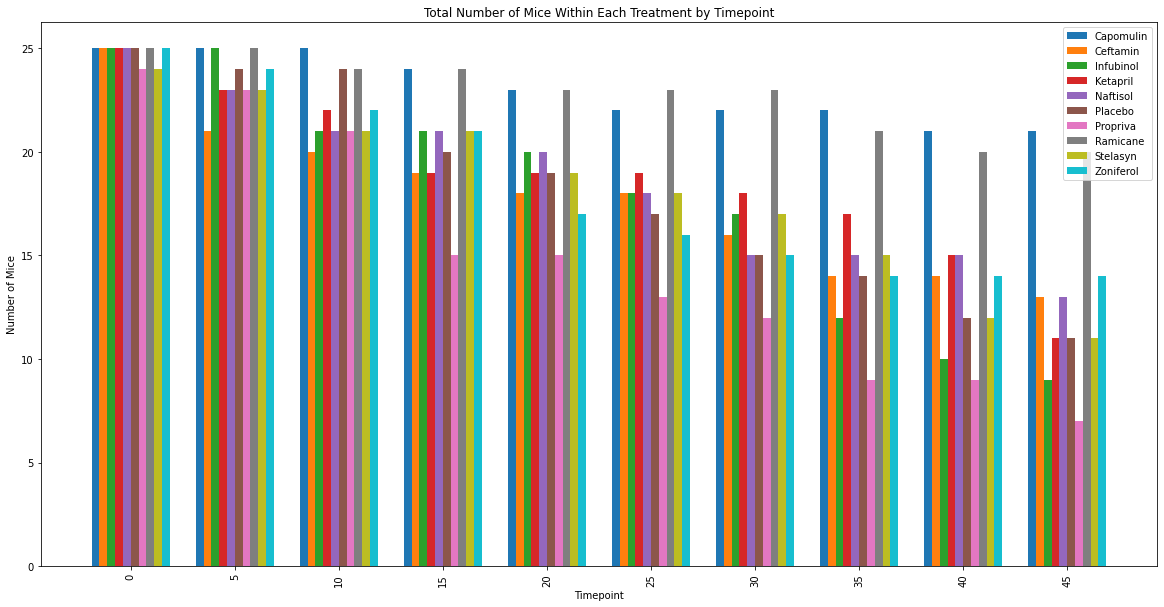

In [85]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# creates labels for the x-axis
labels = cleaned_df['Timepoint'].unique()

#creates tick locations for the x-axis
x = np.arange(len(labels))

#creates a list of Drug Regimens sorted alphabetically
drug = cleaned_df['Drug Regimen'].unique()
drug.sort()

#holds variable for the width of the bars
width = 0.075

# sets fig size to match pandas bar chart
fig = plt.figure(figsize=(20, 10))

# creates bars for each drug at each timepoint and moves them so they don't overlap
ax = fig.subplots()
n = -4.5
for drug in drug:
    ax.bar(x + width*n, unstacked_df[drug] , width, label=drug)
    n=n+1
    
#Sets x and y ticks and labels to match pandas bar chart
ax.set_ylabel('Number of Mice')
ax.set_xlabel('Timepoint')
ax.set_title('Total Number of Mice Within Each Treatment by Timepoint')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

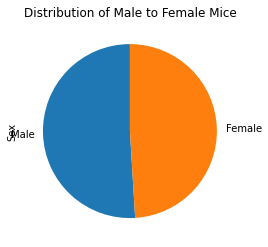

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Generates data for plotting
sex = cleaned_df['Sex'].value_counts()

#Creates and Titles pie chart
sex.plot(kind='pie', startangle=90, title="Distribution of Male to Female Mice")




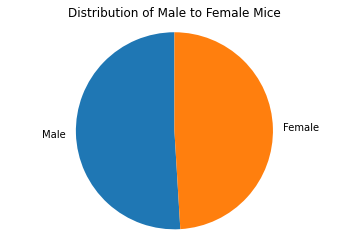

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=cleaned_df["Sex"].unique(), startangle=90)
plt.title("Distribution of Male to Female Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:   Capomulin, Ramicane, Infubinol, and Ceftamin

# Creates a new df with only the target drug data
good_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
good_drugs_df = cleaned_df.loc[cleaned_df['Drug Regimen'].isin(good_drugs)]

# # Start by getting the last (greatest) timepoint for each mouse
# creates new df only with columns of interest then groups by mouse ID
subset = good_drugs_df[['Mouse ID', 'Timepoint']]
tempgroup_df = subset.groupby(['Mouse ID'])

# Uses groupby object to find max timpoint for each mouse ID. Resets to default index for merging.
greatest_df = tempgroup_df['Timepoint'].max()
reset_df = greatest_df.reset_index()

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
analysis_df = reset_df.merge(good_drugs_df, on=['Mouse ID', 'Timepoint'])
analysis_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = analysis_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
lowerq = []
upperq = []
median = []
iqr = []
lower_bound = []
upper_bound = []

# Calculates the quartiles for each drug and stores in one object
quartiles = [analysis_df.loc[analysis_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75]) for drug in treatments]

# Loops through the indexes in quartiles object to create list of each quartile
arange=[0,1,2,3]
for x in arange:
    lowerq.append(quartiles[x][0.25])
    median.append(quartiles[x][0.5])
    upperq.append(quartiles[x][0.75])

#creates a new df for display
display_df = pd.DataFrame({
    'Treatment': treatments,
    'Lower Quartile': lowerq,
    'Median': median,
    'Upper Quartile': upperq,
})

# Calculates IQR and adds to display df
display_df['Interquartile Range'] = display_df['Upper Quartile']-display_df['Lower Quartile']
display_df

,Treatment,Lower Quartile,Median,Upper Quartile,Interquartile Range
0,Infubinol,54.048608,60.165180,65.525743,11.477135
1,Ceftamin,48.722078,59.851956,64.299830,15.577752
2,Ramicane,31.560470,36.561652,40.659006,9.098537
3,Capomulin,32.377357,38.125164,40.159220,7.781863


In [89]:
# Determine outliers using upper and lower bounds
#creates a new df holding upper and lower bounds for each drug regimen
outlier_df = pd.DataFrame()
outlier_df['lower_bound'] = display_df['Lower Quartile'] - 1.5*display_df['Interquartile Range']
outlier_df['upper_bound'] = display_df['Upper Quartile'] + 1.5*display_df['Interquartile Range']
outlier_df['Drug Regimen'] = display_df['Treatment']

#merges the upper and lower bound columns onto the full analysis dataframe by treatment
analysis2_df = analysis_df.merge(outlier_df, on='Drug Regimen')

#creates a new df containing only the outlier rows
outlierdata_df = analysis2_df.loc[(analysis2_df['Tumor Volume (mm3)'] > analysis2_df['upper_bound']) | (analysis2_df['Tumor Volume (mm3)'] < analysis2_df['lower_bound'])]
outlierdata_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,lower_bound,upper_bound
5,c326,5,Infubinol,Female,18,25,36.321346,0,36.832905,82.741446


{'whiskers': [<matplotlib.lines.Line2D at 0x28a42304a58>,
 'caps': [<matplotlib.lines.Line2D at 0x28a42304f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a422faeb8>,
 'medians': [<matplotlib.lines.Line2D at 0x28a42311668>,
 'fliers': [<matplotlib.lines.Line2D at 0x28a423119e8>,
 'means': []}

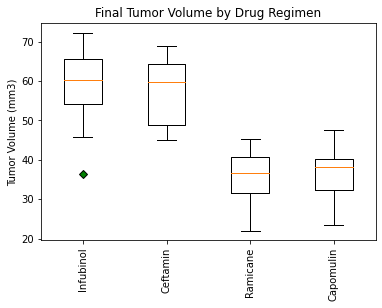

In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# creates new df with subset of data needed
new2_df = analysis_df[['Drug Regimen', 'Tumor Volume (mm3)']]

#creates a list of list containing the tumor volume for each drug
test = analysis_df.loc[analysis_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'].to_list()
test2 = analysis_df.loc[analysis_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'].to_list()
test3 = analysis_df.loc[analysis_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'].to_list()
test4 = analysis_df.loc[analysis_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'].to_list()
test5 = [test, test2, test3, test4]

# creats box plot for each drug with green_diamond as highlight on outliers
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(treatments, rotation='vertical')
ax1.boxplot(test5, flierprops=green_diamond)



## Line and Scatter Plots

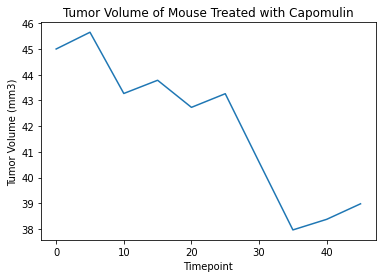

In [74]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#creates a df containing only the data for mouse 'b128' which was treated with Capomulin
mouse1_df = cleaned_df.loc[cleaned_df['Mouse ID']=='b128']

#creates line plot
fig2, ax2 = plt.subplots()
ax2.set_title('Tumor Volume of Mouse Treated with Capomulin')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Timepoint')
ax2.plot(mouse1_df['Timepoint'], mouse1_df['Tumor Volume (mm3)'])

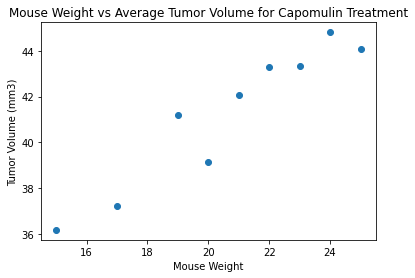

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# creates new df containing only mice treated with Capomulin and then another new df with only columns of interest
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']
subsetcap_df = capomulin_df[['Weight (g)','Tumor Volume (mm3)']]

# groups by weight and then finds the mean tumor volume for each
capogrp_df = subsetcap_df.groupby('Weight (g)').mean()

# resets index to default
capogrp_df = capogrp_df.reset_index()

#creates scatter plot
fig3, ax3 = plt.subplots()
ax3.set_title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment')
ax3.set_ylabel('Average Tumor Volume (mm3)')
ax3.set_xlabel('Mouse Weight')
ax3.scatter(capogrp_df['Weight (g)'], capogrp_df['Tumor Volume (mm3)'])

## Correlation and Regression

In [104]:
# Calculates the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capogrp_df['Weight (g)'], capogrp_df['Tumor Volume (mm3)'])
print(f'The correlation coefficient (pearson r) for mouse weight and average tumor volume is: {round(rvalue,2)} (pvalue={round(pvalue,4)})')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression model for mouse weight and aveage tumor volume is: {line_eq}')

The correlation coefficient (pearson r) for mouse weight and average tumor volume is: 0.95 (pvalue=0.0001)
The linear regression model for mouse weight and aveage tumor volume is: y = 0.89x + 22.76
